# Add slice of zeros to a bunch of the forcing files

In [1]:
import numpy as np
import xarray as xr
import glob
import matplotlib.pyplot as plt
import glob

#### Functions

In [ ]:
# https://stackoverflow.com/questions/33435953/is-it-possible-to-append-to-an-xarray-dataset

### Main

In [10]:
domain_old   = xr.open_dataset(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/bathymetry/domain_cfg-old.nc')
domain_new   = xr.open_dataset(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/bathymetry/domain_cfg-20231025.nc')

# Easy files: fill extra slice with zeros

In [ ]:
vars  = ['berg_melt', 'bfr_coef', 'soicbclv', 'shlat2d', 'socoefr']
folder_out = '/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/old-forcing/extended/'
files = glob.glob('/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/old-forcing/*.nc')
for var in vars:
    print(var)
    for file in files:
        ds = xr.open_dataset(file)
        if var in ds:
            try:
                new_var = np.zeros((ds.time_counter.shape[0], domain_new.nav_lon.shape[0], domain_new.nav_lon.shape[1]))
                new_var[:,:domain_old.nav_lon.shape[0],:] = ds[var].values
                new_var[np.isnan(new_var)] = 0 
                
                ds_new = xr.Dataset(data_vars = {var:(["time_counter", "y", "x"], new_var)},
                                    coords    = {'nav_lon': domain_new.nav_lon,
                                                 'nav_lat': domain_new.nav_lat,
                                                 'time_counter': ds.time_counter})
                ds_new.to_netcdf(f"{folder_out}{file.split('old-forcing/')[1].split('.')[0]}-extended.nc")
            except:
                new_var = np.zeros((domain_new.nav_lon.shape[0], domain_new.nav_lon.shape[1]))
                new_var[:domain_old.nav_lon.shape[0],:] = ds[var].values
                new_var[np.isnan(new_var)] = 0 
                
                ds_new = xr.Dataset(data_vars = {var:(["y", "x"], new_var)},
                                    coords    = {'nav_lon': domain_new.nav_lon,
                                                 'nav_lat': domain_new.nav_lat})
                new_name = file.split('old-forcing/')
                ds_new.to_netcdf(f"{folder_out}{file.split('old-forcing/')[1].split('.')[0]}-extended.nc")

# More complicated files:

empc, iwm, corodinates_bdy, distcoast

In [24]:
iwm_old          = xr.open_dataset(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/old-forcing/iwm.nc')
coord_bdy_old    = xr.open_dataset(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/old-forcing/coordinates_bdy.nc')
empc_old         = xr.open_dataset(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/old-forcing/empc.nc')
distcoast_old    = xr.open_dataset(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/old-forcing/distcoast.nc')
runoff_old       = xr.open_dataset(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/old-forcing/runoff.nc')
runoff_y1979_old = xr.open_dataset(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/old-forcing/runoff_y1979.nc')

folder_out = '/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/old-forcing/extended/'

In [61]:
var = 'socoefr'

new_var = np.zeros((runoff_old.time_counter.shape[0], domain_new.nav_lon.shape[0], domain_new.nav_lon.shape[1]))                
ds_new  = xr.Dataset(data_vars = {var:(["time_counter", "y", "x"], new_var)},
                     coords    = {'nav_lon': domain_new.nav_lon,
                                  'nav_lat': domain_new.nav_lat,
                                  'time_counter': runoff_old.time_counter})
ds_new.to_netcdf(f"{folder_out}runoff-extended.nc")

In [ ]:
var = 'marrunof'

new_var = np.zeros((runoff_y1979_old.time.shape[0], domain_new.nav_lon.shape[0], domain_new.nav_lon.shape[1]))
new_var[:,:domain_old.nav_lon.shape[0],:] = runoff_y1979_old[var].values
new_var[np.isnan(new_var)] = 0 
                
ds_new = xr.Dataset(data_vars = {var:(["time", "y", "x"], new_var)},
                    coords    = {'nav_lon': domain_new.nav_lon,
                                 'nav_lat': domain_new.nav_lat,
                                 'time': runoff_y1979_old.time})
ds_new.to_netcdf(f"{folder_out}runoff-extended_y1979.nc")

In [23]:
# fill with mean value in domain
vars   = list(iwm_old.keys())
ds_new = xr.Dataset(coords = {'nav_lon': domain_new.nav_lon,
                              'nav_lat': domain_new.nav_lat,
                              'time_counter': iwm_old.time_counter})
for var in vars:
    print(var)
    
    new_var = np.zeros((iwm_old.time_counter.shape[0], domain_new.nav_lon.shape[0], domain_new.nav_lon.shape[1]))
    new_var[:]                 = np.nanmean(iwm_old[var].values) 
    new_var[:,:domain_old.nav_lon.shape[0],:]          = iwm_old[var].values
    new_var[np.isnan(new_var)] = np.nanmean(iwm_old[var].values) 
                
    ds_new[var] = (("time_counter", "y", "x"), new_var)
    
ds_new.to_netcdf(f"{folder_out}iwm-extended.nc")

power_bot
power_cri
power_nsq
power_sho
scale_bot
scale_cri


In [91]:
# copy over the grid cells just south of the boundary
var = 'sowafld'

new_var = np.zeros((empc_old.time_counter.shape[0], domain_new.nav_lon.shape[0], domain_new.nav_lon.shape[1]))
new_var[:,:domain_old.nav_lon.shape[0],:] = empc_old[var].values
new_var[:,domain_old.nav_lon.shape[0]:,:] = empc_old[var].values[:,-(domain_new.nav_lon.shape[0] - domain_old.nav_lon.shape[0]):,:]
new_var[np.isnan(new_var)] = 0 
                
ds_new = xr.Dataset(data_vars = {var:(["time_counter", "y", "x"], new_var)},
                    coords    = {'nav_lon': domain_new.nav_lon,
                                 'nav_lat': domain_new.nav_lat,
                                 'time_counter': empc_old.time_counter})
ds_new.to_netcdf(f"{folder_out}empc-extended.nc")

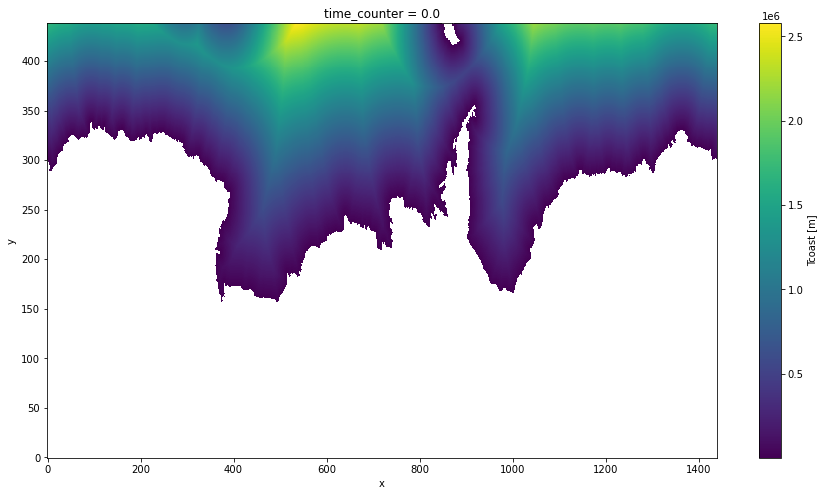

In [95]:
distcoast_old.Tcoast.isel(time_counter=0).plot(figsize=(15,8))

In [97]:
# copy over the grid cells just south of the boundary
var = 'Tcoast'

new_var = np.zeros((distcoast_old.time_counter.shape[0], domain_new.nav_lon.shape[0], domain_new.nav_lon.shape[1]))
new_var[:,:domain_old.nav_lon.shape[0],:] = distcoast_old[var].values
new_var[:,domain_old.nav_lon.shape[0]:,:] = distcoast_old[var].values[:,-(domain_new.nav_lon.shape[0] - domain_old.nav_lon.shape[0]):,:]
new_var[np.isnan(new_var)] = 0 
                
ds_new = xr.Dataset(data_vars = {var:(["time_counter", "y", "x"], new_var)},
                    coords    = {'nav_lon': domain_new.nav_lon,
                                 'nav_lat': domain_new.nav_lat,
                                 'time_counter': distcoast_old.time_counter})
ds_new.to_netcdf(f"{folder_out}distcoast-extended.nc")